<a href="https://colab.research.google.com/github/CharleneLimKH/python-mini-projects/blob/main/First_test_Quantum_Computing_with_Pennylane.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
!pip install pennylane
import pennylane as qml
from pennylane import numpy as np

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
#create device with 1 qubit which samples the measurements 10 times
dev1=qml.device("default.qubit", wires=1, shots=10)

In [7]:
#create a circuit which does the measurement in the computational basis
@qml.qnode(dev1)
def circuit(params):
  return qml.sample(qml.PauliZ(0))

In [8]:
#show result of running this circuit on the device
print(circuit([]))

[1 1 1 1 1 1 1 1 1 1]


In [10]:
#show graphical visualisation of this circuit
drawer=qml.draw(circuit)
print(drawer([]))

0: ───┤  Sample[Z]


In [22]:
#Adding PauliX to new circuit
#qml.PauliX(wires=0)
@qml.qnode(dev1)
def circuit1(params):
  qml.PauliX(0)
  return qml.sample(qml.PauliZ(0))
 

In [23]:
 print(circuit1([]))

[-1 -1 -1 -1 -1 -1 -1 -1 -1 -1]


In [19]:
#creating circuit with Hadmard gate
@qml.qnode(dev1)
def circuit2(params):
  qml.Hadamard(0)
  return qml.sample(qml.PauliZ(0))

In [25]:
print(circuit2([]))

[ 1 -1 -1  1 -1  1  1  1  1  1]


In [43]:
import matplotlib.pyplot as plt
def plotchart(t):
  if len(t.shape)==1: #convert 1d tensor to 2d tensor
    t=t.reshape(1, len(t))
  wireCnt=t.shape[0]
  stateCnt=pow(2,wireCnt)
  states=np.zeros((wireCnt,stateCnt))
  stateStats=np.zeros((stateCnt))
  labels=[]
  for i in range(stateCnt): #for each state
    for j in range(wireCnt): #encode state# in wires
      states[j][i]=1 if (i&pow(2,j)) else -1
    labels.append(str(states[:,i]))
    for j in range(t.shape[1]): #for all measured states
      stateStats[i]+=1 if (states[:,i]==t[:,j]).all() else 0
  plt.bar(range(stateCnt), stateStats, tick_label=labels)
  

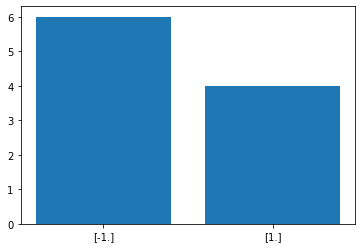

In [45]:
plotchart(circuit2([]))

In [52]:
#create device with 2 qubit which samples the measurement 10 times
dev2=qml.device("default.qubit", wires=2, shots=10)

In [58]:
#creating circuit CNOT
@qml.qnode(dev2)
def circuit3(params):
  qml.PauliX(0) #set qubit 0 to |1> #comment and uncomment these two lines as needed
  qml.PauliX(1) #set qubit 1 to |1>
  qml.CNOT(wires=[0,1])
  return qml.sample(qml.PauliZ(0)),qml.sample(qml.PauliZ(1))

In [59]:
print(circuit3([]))

[[-1 -1 -1 -1 -1 -1 -1 -1 -1 -1]
 [ 1  1  1  1  1  1  1  1  1  1]]


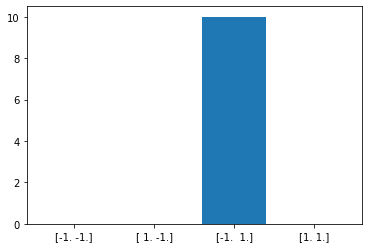

In [62]:
plotchart(circuit3([True,True]))

In [67]:
#creating circuit with two Hadmard gates
@qml.qnode(dev2)
def circuit4(params):
  qml.Hadamard(0)
  qml.Hadamard(1)
  return qml.sample(qml.PauliZ(0)),qml.sample(qml.PauliZ(1))

In [81]:
(circuit4([True,True]))

tensor([[-1, -1, -1,  1,  1, -1, -1,  1,  1,  1],
        [ 1, -1,  1, -1, -1, -1,  1,  1,  1, -1]], requires_grad=True)

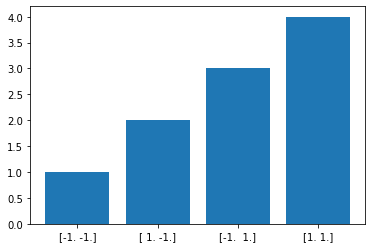

In [71]:
dev2=qml.device("default.qubit", wires=2, shots=20)
plotchart(circuit4([True,True]))

In [73]:
#creating circuit with Hadmard and CNOT
@qml.qnode(dev2)
def circuit5(params):
  qml.Hadamard(0)
  qml.CNOT(wires=[0,1])
  return qml.sample(qml.PauliZ(0)),qml.sample(qml.PauliZ(1))

In [80]:
(circuit5([]))

tensor([[ 1,  1, -1, -1,  1, -1,  1,  1, -1,  1, -1,  1,  1,  1,  1, -1,
          1,  1, -1, -1],
        [ 1,  1, -1, -1,  1, -1,  1,  1, -1,  1, -1,  1,  1,  1,  1, -1,
          1,  1, -1, -1]], requires_grad=True)

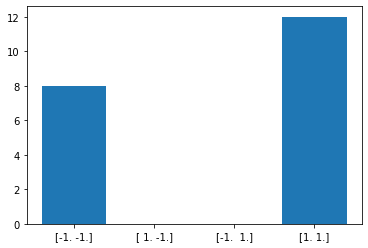

In [79]:
plotchart(circuit5([True,True]))